<center>
    <u>
        <font size=30>Matu the Hamster: <br><br>24h running wheel data analysis</font>
    </u>
</center><br><br>

Dataset metadata:
- Has one feature: 10cm radius hamster wheel rotation timestamp in Unix Epoch units with [millisecond] precision
- Each observation corresponds to 1 wheel revolution

In [1]:
import pandas as pd

#read the raw unix timestamp data into DF
wheel_df = pd.read_csv('matu_wheel_log.csv',
                          header=None,
                          names=['unix_ts_ms'])
wheel_df.head(3)

,unix_ts_ms
0,1636217711256
1,1636217712103
2,1636217713260


In [2]:
#missing values
wheel_df.isna().sum()

unix_ts_ms    0
dtype: int64

In [3]:
#check the data type 
wheel_df.dtypes

unix_ts_ms    int64
dtype: object

In [4]:
#convert unix to human readale datetime
wheel_df["ts_datetime"] = wheel_df.unix_ts_ms.astype('datetime64[ms]')

#
wheel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12149 entries, 0 to 12148
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   unix_ts_ms   12149 non-null  int64         
 1   ts_datetime  12149 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 190.0 KB


In [5]:
wheel_df.head(3)

,unix_ts_ms,ts_datetime
0,1636217711256,2021-11-06 16:55:11.256
1,1636217712103,2021-11-06 16:55:12.103
2,1636217713260,2021-11-06 16:55:13.260


In [6]:
#determen time duration the data was gathered
measurement_dur = wheel_df.loc[wheel_df.index[-1], 'ts_datetime'] - wheel_df.loc[0, 'ts_datetime']

print(type(measurement_dur))
print(measurement_dur)

<class 'pandas._libs.tslibs.timedeltas.Timedelta'>
0 days 22:49:03.246000


In [7]:
import datetime as dt

#convert measurement duration into readable form H:M:S
dur_components = measurement_dur.components
print(dur_components)
print('')
duration = dt.time(dur_components.hours,
                  dur_components.minutes,
                  dur_components.seconds)
print("Measurement duration:", duration)

Components(days=0, hours=22, minutes=49, seconds=3, milliseconds=246, microseconds=0, nanoseconds=0)

Measurement duration: 22:49:03


In [8]:
#find times wheel made a full revolution
wheel_df['rev_time_ms'] = wheel_df.unix_ts_ms.diff()
wheel_df.head(3)

,unix_ts_ms,ts_datetime,rev_time_ms
0,1636217711256,2021-11-06 16:55:11.256,NaN
1,1636217712103,2021-11-06 16:55:12.103,847.0
2,1636217713260,2021-11-06 16:55:13.260,1157.0


In [9]:
#find number of missing values
wheel_df.rev_time_ms.isna().sum()

1

In [10]:
#change missing value to 0
wheel_df['rev_time_ms'] = wheel_df.rev_time_ms.fillna(0)
wheel_df.head(3)

,unix_ts_ms,ts_datetime,rev_time_ms
0,1636217711256,2021-11-06 16:55:11.256,0.0
1,1636217712103,2021-11-06 16:55:12.103,847.0
2,1636217713260,2021-11-06 16:55:13.260,1157.0


In [11]:
#change "rev_time_ms" datatype from float64 to int64
wheel_df['rev_time_ms'] = wheel_df.rev_time_ms.astype('int64')
wheel_df.head(3)

,unix_ts_ms,ts_datetime,rev_time_ms
0,1636217711256,2021-11-06 16:55:11.256,0
1,1636217712103,2021-11-06 16:55:12.103,847
2,1636217713260,2021-11-06 16:55:13.260,1157


In [12]:
#create rev_time in seconds column
wheel_df['rev_time_s'] = wheel_df.rev_time_ms * 0.001
wheel_df.head(3)

,unix_ts_ms,ts_datetime,rev_time_ms,rev_time_s
0,1636217711256,2021-11-06 16:55:11.256,0,0.000
1,1636217712103,2021-11-06 16:55:12.103,847,0.847
2,1636217713260,2021-11-06 16:55:13.260,1157,1.157


In [13]:
import numpy as np

#knowing the distance of the each revolution is the
#circumference of the wheel C = 2pi r
wheel_radius_m = 0.1
C_m = 2 * np.pi * wheel_radius_m
print("Wheel circumference is",np.round(C_m,2), 'm')

#calculate the mean speed of each revolution
wheel_df['rev_speed_m/s'] = C_m /  wheel_df.rev_time_s

wheel_df.head(3)

Wheel circumference is 0.63 m


,unix_ts_ms,ts_datetime,rev_time_ms,rev_time_s,rev_speed_m/s
0,1636217711256,2021-11-06 16:55:11.256,0,0.000,inf
1,1636217712103,2021-11-06 16:55:12.103,847,0.847,0.741816
2,1636217713260,2021-11-06 16:55:13.260,1157,1.157,0.543058


In [14]:
#number of infinities in df
np.isinf(wheel_df['rev_speed_m/s']).sum()

1

In [15]:
#convert infinities to 0
wheel_df.replace(np.inf,np.nan, inplace=True)

wheel_df.head(3)

,unix_ts_ms,ts_datetime,rev_time_ms,rev_time_s,rev_speed_m/s
0,1636217711256,2021-11-06 16:55:11.256,0,0.000,NaN
1,1636217712103,2021-11-06 16:55:12.103,847,0.847,0.741816
2,1636217713260,2021-11-06 16:55:13.260,1157,1.157,0.543058


In [16]:
#convert NaN to 0
wheel_df.fillna(0, inplace=True)
wheel_df.head(3)

,unix_ts_ms,ts_datetime,rev_time_ms,rev_time_s,rev_speed_m/s
0,1636217711256,2021-11-06 16:55:11.256,0,0.000,0.000000
1,1636217712103,2021-11-06 16:55:12.103,847,0.847,0.741816
2,1636217713260,2021-11-06 16:55:13.260,1157,1.157,0.543058


### EDA for outliers

In [17]:
#inspect distribution of speed values
wheel_df["rev_speed_m/s"].describe()

count    12149.000000
mean         0.721567
std          0.361023
min          0.000000
25%          0.577499
50%          0.776661
75%          0.892498
max         28.559933
Name: rev_speed_m/s, dtype: float64

In [18]:
#manually check speed values > 4
wheel_df[wheel_df['rev_speed_m/s'] > 4]

,unix_ts_ms,ts_datetime,rev_time_ms,rev_time_s,rev_speed_m/s
12137,1636273297117,2021-11-07 08:21:37.117,22,0.022,28.559933
12138,1636273297207,2021-11-07 08:21:37.207,90,0.090,6.981317
12140,1636273399583,2021-11-07 08:23:19.583,95,0.095,6.613879
12142,1636273424050,2021-11-07 08:23:44.050,129,0.129,4.870686


* Manually inspect data around the outliers to see if they are caused by malfunction of the sensor

In [19]:
wheel_df.iloc[12130:12150,:]

,unix_ts_ms,ts_datetime,rev_time_ms,rev_time_s,rev_speed_m/s
12130,1636254883574,2021-11-07 03:14:43.574,2218,2.218,0.283282
12131,1636254885869,2021-11-07 03:14:45.869,2295,2.295,0.273777
12132,1636254887221,2021-11-07 03:14:47.221,1352,1.352,0.464733
12133,1636254888648,2021-11-07 03:14:48.648,1427,1.427,0.440307
12134,1636262116555,2021-11-07 05:15:16.555,7227907,7227.907,0.000087
12135,1636262186612,2021-11-07 05:16:26.612,70057,70.057,0.008969
12136,1636273297095,2021-11-07 08:21:37.095,11110483,11110.483,0.000057
12137,1636273297117,2021-11-07 08:21:37.117,22,0.022,28.559933
12138,1636273297207,2021-11-07 08:21:37.207,90,0.090,6.981317
12139,1636273399488,2021-11-07 08:23:19.488,102281,102.281,0.006143


* Visualize the outliers by plotting speed vs time

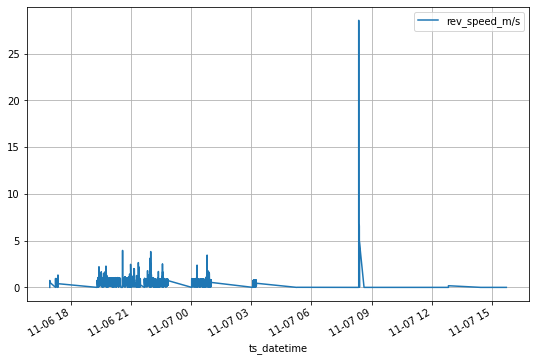

In [20]:
import matplotlib.pyplot as plt

#plot rev_speed vs time
wheel_df.plot.line(x='ts_datetime',
                   y='rev_speed_m/s',
                   figsize=(9,6),
                   grid=True)
plt.show()

* Plot is dominated by the max outlier
* Plot confirms that speeds above 5 m/s are not realistic and can be cut

### Removing outliers from the dataset

In [21]:
print('Dataset shape with outliers:', wheel_df.shape)

#removing observations where rev_speed_m/s > 5
wheel_df = wheel_df[wheel_df['rev_speed_m/s'] < 5]

print('\nDataset shape after removing outliers:', wheel_df.shape)

Dataset shape with outliers: (12149, 5)

Dataset shape after removing outliers: (12146, 5)


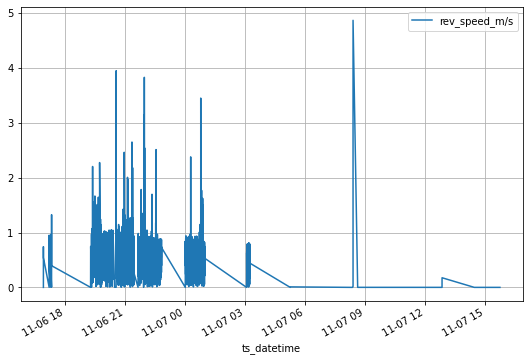

In [22]:
#plot rev_speed vs time after removing outliers
wheel_df.plot.line(x='ts_datetime',
                   y='rev_speed_m/s',
                   figsize=(9,6),
                   grid=True)
plt.show()

In [33]:
#create a new feature with time only
test = wheel_df.ts_datetime[0]
print(test)

2021-11-06 16:55:11.256000


In [35]:
test.strftime('%H:%M:%f')

'16:55:256000'

In [41]:
%timeit for _ in range(100): True
wheel_df.ts_datetime.dt.strftime('%H:%M:%f')

1.58 µs ± 327 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


0        16:55:256000
1        16:55:103000
2        16:55:260000
3        17:12:899000
4        17:12:559000
             ...     
12144    12:14:854000
12145    12:50:237000
12146    12:50:815000
12147    14:27:416000
12148    15:44:502000
Name: ts_datetime, Length: 12146, dtype: object

In [42]:
%timeit for _ in range(100): True
wheel_df.ts_datetime.apply(lambda x: x.strftime('%H:%M:%f'))

1.22 µs ± 18.8 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


0        16:55:256000
1        16:55:103000
2        16:55:260000
3        17:12:899000
4        17:12:559000
             ...     
12144    12:14:854000
12145    12:50:237000
12146    12:50:815000
12147    14:27:416000
12148    15:44:502000
Name: ts_datetime, Length: 12146, dtype: object

* There are more outliers due to sensor error etc, to investigte also the dense areas lets create a zoom-able plot with <code>bokeh</code>

In [25]:
#import pre-defined function
from bokeh_plots import line
from bokeh.plotting import output_notebook

output_notebook()

Loading BokehJS ...

In [27]:
line(wheel_df, 'ts_datetime', 'rev_speed_m/s')